In [1]:
import torch
import torch.nn.functional as F

In [2]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets

In [3]:
device = torch.device('cuda:0' if torch.cuda.is_available else 'cpu')

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
%cd /content/gdrive/My Drive/

/content/gdrive/My Drive


In [6]:
path = r'/content/gdrive/MyDrive/PetImages'

In [7]:
data_transform = transforms.Compose([
    transforms.Resize(size=(32,32)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.ToTensor() 
])

In [8]:
train_data = datasets.ImageFolder(root=path, 
                                  transform=data_transform)
                                  
test_data = datasets.ImageFolder(root=path, 
                                 transform=data_transform)

In [9]:
train_dataloader = DataLoader(dataset=train_data, 
                              batch_size=32, 
                              shuffle=True) 

test_dataloader = DataLoader(dataset=test_data, 
                             batch_size=32, 
                             shuffle=False) 

In [10]:
class_names = train_data.classes
class_dict = train_data.class_to_idx

In [ ]:
class_names

['Cat', 'Dog']

In [ ]:
class_dict

{'Cat': 0, 'Dog': 1}

In [13]:
class CNN(torch.nn.Module):
    def __init__(self):
        super().__init__()

        self.maxpool = torch.nn.MaxPool2d(2,2)

        self.dropout = torch.nn.Dropout(p = 0.2)

        self.conv = torch.nn.Conv2d(3, 32, kernel_size = 3, padding=1)
        self.conv_bn = torch.nn.BatchNorm2d(32)

        self.conv1 = torch.nn.Conv2d(32, 64, kernel_size = 3, padding=1)
        self.conv_bn1 = torch.nn.BatchNorm2d(64)

        self.conv2 = torch.nn.Conv2d(64, 128, kernel_size = 3, padding=1)
        self.conv_bn2 = torch.nn.BatchNorm2d(128)

        self.fc1 = torch.nn.Linear(128 * 16, 1_000)

        self.fc2 = torch.nn.Linear(1_000, 2)


    def forward(self, x):
        x = self.conv_bn(F.relu(self.conv(x)))
        x = self.maxpool(x)

        x = self.conv_bn1(F.relu(self.conv1(x)))
        x = self.maxpool(x)

        x = self.conv_bn2(F.relu(self.conv2(x)))
        x = self.maxpool(x)

        x = x.view(-1, 128 * 16)

        x = F.relu(self.fc1(x))
        x = self.dropout(self.fc2(x))

        return x

In [14]:
model = CNN()
model = model.to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [15]:
num_epochs = 1

In [16]:
total_step = len(train_dataloader)
loss_list = []
acc_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_dataloader):
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss_list.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total = labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct = (predicted == labels).sum().item()
        acc_list.append(correct / total)

        if (i + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{total_step}], Loss: {loss.item()}, Accuracy: {(correct / total) * 100}%')
                 

Epoch [1/1], Step [100/782], Loss: 0.6252822279930115, Accuracy: 71.875%
Epoch [1/1], Step [200/782], Loss: 0.5617464184761047, Accuracy: 71.875%
Epoch [1/1], Step [300/782], Loss: 0.688501238822937, Accuracy: 53.125%
Epoch [1/1], Step [400/782], Loss: 0.5746303796768188, Accuracy: 65.625%
Epoch [1/1], Step [500/782], Loss: 0.6539686918258667, Accuracy: 56.25%
Epoch [1/1], Step [600/782], Loss: 0.5705136060714722, Accuracy: 71.875%


/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:767: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:767: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:767: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:767: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:767: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 283
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:767: UserWar

Epoch [1/1], Step [700/782], Loss: 0.5779812335968018, Accuracy: 68.75%
Epoch [2/1], Step [100/782], Loss: 0.6253708004951477, Accuracy: 68.75%
Epoch [2/1], Step [200/782], Loss: 0.5190054178237915, Accuracy: 78.125%
Epoch [2/1], Step [300/782], Loss: 0.441564679145813, Accuracy: 81.25%
Epoch [2/1], Step [400/782], Loss: 0.5751113891601562, Accuracy: 68.75%
Epoch [2/1], Step [500/782], Loss: 0.5861628651618958, Accuracy: 68.75%
Epoch [2/1], Step [600/782], Loss: 0.6225106120109558, Accuracy: 65.625%
Epoch [2/1], Step [700/782], Loss: 0.5170279145240784, Accuracy: 71.875%


In [64]:
path_for_saving = 'parameters_file'

In [65]:
torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss
            }, path_for_saving)

In [66]:
checkpoint = torch.load(path_for_saving)
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']

In [18]:
import matplotlib.pyplot as plt

In [51]:
def show(p, label = None, prob = None):
  image = plt.imread(p)
  plt.imshow(image)

  name = p.split('/')[-2]
  if label and prob:
      plt.imshow(image.squeeze())
  
      title = f"Pred: {label} | Prob: {prob}"

      plt.title(title)
      plt.axis(False)
  else:
     plt.title(name)
     plt.axis(False)

In [34]:
p = f'{path}/Dog/137.jpg'

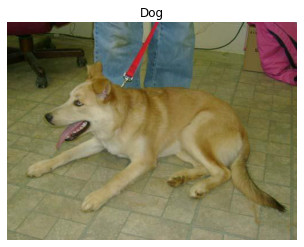

In [52]:
show(p)

In [21]:
import torchvision

In [22]:
image = torchvision.io.read_image(str(p)).type(torch.float32) / 255.

In [23]:
transform = transforms.Compose([
    transforms.Resize((32, 32)),
])

In [24]:
transformed = transform(image)

In [25]:
model.eval()

with torch.inference_mode():
  pred = model(transformed.unsqueeze(dim=0).to(device))

In [26]:
from typing import List

In [61]:
def pred_and_plot_image(model: torch.nn.Module, 
                        image_path: str, 
                        class_names: List[str] = None, 
                        transform=None,
                        device: torch.device = device):

    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32) / 255. 
    image = torchvision.io.read_image(str(image_path)).type(torch.float32) / 255.
    
    if transform:
        target_image = transform(target_image)
    
    model.to(device)
    
    model.eval()
    with torch.inference_mode():    
        target_image_pred = model(target_image.unsqueeze(dim=0).to(device))
        
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    label = class_names[target_image_pred_label.cpu()]
    prob = target_image_pred_probs.max().cpu()
 
    show(image_path, label, f'{prob:.3f}')

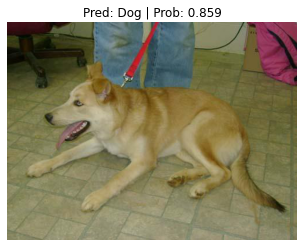

In [62]:
pred_and_plot_image(model=model,
                    image_path=p,
                    class_names=class_names,
                    transform=transform,
                    device=device)